In [1]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)

import datetime as datetime


import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go


import matplotlib.pyplot as plt
import calendar
from datetime import datetime


In [2]:
# df=pd.DataFrame()
# chunk_size = 1000000  # Adjust based on your memory constraints
# for chunk in pd.read_csv('IBM1.csv', chunksize=chunk_size,encoding='ISO_8859_1'):
#     # print(chunk.head())
#     df=pd.concat([df,chunk])
#     print(df.shape)

df=pd.read_csv('model_Dataset.csv')

In [3]:
df.head()

,Unnamed: 0,Date,Amount,Use Chip,Merchant City,Merchant State,MCC,Is Fraud?,Current Age,Gender,Latitude,Longitude,Yearly Income - Person,Total Debt,FICO Score,CARD INDEX,Card Brand,Card Type,Card Number,Has Chip,Cards Issued,Credit Limit
0,0,2015-11-15,287.13,Online Transaction,ONLINE,ONLINE,3001,1,53,Female,34.15,-117.76,59696,127613,787,0,Visa,Debit,4344676511950444,1,2,24295
1,1,2015-11-15,2.41,Online Transaction,ONLINE,ONLINE,5651,1,53,Female,34.15,-117.76,59696,127613,787,0,Visa,Debit,4344676511950444,1,2,24295
2,2,2015-11-16,50.81,Online Transaction,ONLINE,ONLINE,4411,1,53,Female,34.15,-117.76,59696,127613,787,0,Visa,Debit,4344676511950444,1,2,24295
3,3,2015-11-16,248.36,Online Transaction,ONLINE,ONLINE,5732,1,53,Female,34.15,-117.76,59696,127613,787,0,Visa,Debit,4344676511950444,1,2,24295
4,4,2015-11-16,473.00,Online Transaction,ONLINE,ONLINE,3640,1,53,Female,34.15,-117.76,59696,127613,787,0,Visa,Debit,4344676511950444,1,2,24295


In [4]:
data=df.copy()
data['Date'] = pd.to_datetime(data['Date'])
data['year']=data['Date'].dt.year

data['Card Number']=data['Card Number'].astype(np.int64)
data['year']=data['year'].astype('str')
data['MCC']=data['MCC'].astype('str')
data['Is Fraud?']=data['Is Fraud?'].map({0: 'Non_Fraudulent', 1: 'Fraudulent'})
data['Has Chip']=data['Has Chip'].map({0: 'NO', 1: 'Yes'})

In [5]:
data.shape

(59514, 23)

# visualizations

In [6]:
data['FICO Score'].nunique()

288

## Univariate Analysis

In [7]:
labels = data['Is Fraud?'].value_counts().index
values = data['Is Fraud?'].value_counts().values
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(
    title="transaction Data Distribution".upper(),
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#000000"
    )
)

fig.show()

In [8]:
labels = data['Has Chip'].value_counts().index
values = data['Has Chip'].value_counts().values
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(
    title="Analysis of chip in card".upper(),
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#000000"
    )
)

fig.show()

In [9]:
df=data.groupby('year')['year'].agg(['count']).sort_values(by='count',ascending=False)
df=df.reset_index()
px.bar(data_frame=df,x='year',y='count',color='year',barmode='group',text_auto=True,title='Analysis of transactions based on year'.upper())

In [10]:
df=data.groupby('Use Chip')['Use Chip'].agg(['count']).sort_values(by='count',ascending=False)[:10]
df=df.reset_index()
px.bar(data_frame=df,x='Use Chip',y='count',color='Use Chip',barmode='group',text_auto=True,title='Analysis of Types of transactions'.upper())

In [11]:
df=data.groupby('Card Brand')['Card Brand'].agg(['count']).sort_values(by='count',ascending=False)[:10]
df=df.reset_index()
px.bar(data_frame=df,x='Card Brand',y='count',color='Card Brand',barmode='group',text_auto=True,title='Analysis of Types of cards'.upper())

In [12]:
df=data.groupby('Card Type')['Card Type'].agg(['count']).sort_values(by='count',ascending=False)[:10]
df=df.reset_index()
px.bar(data_frame=df,x='Card Type',y='count',color='Card Type',barmode='group',text_auto=True,title='Analysis of Types of cards'.upper())

In [13]:
df=data.groupby('Card Number')['Card Number'].agg(['count']).sort_values(by='count',ascending=False)[:10]
df=df.reset_index()
df['Card Number']=df['Card Number'].astype('str')
fig=px.bar(data_frame=df,x='Card Number',y='count',color='Card Number',barmode='group',text_auto=True,title='Analysis of transactions based on card number'.upper())
fig.update_xaxes(tickangle=45)

In [14]:
df=data.groupby('MCC')['MCC'].agg(['count']).sort_values(by='count',ascending=False)[:10]
df=df.reset_index()
px.bar(data_frame=df,x='MCC',y='count',color='MCC',barmode='group',text_auto=True,title='category wise analysis'.upper())
# fig.update_traces(texttemplate='%{text:.2s}', textposition='top center')
# fig.show()

In [15]:
data['FICO Score']=data['FICO Score'].astype('str')
df=data.groupby('FICO Score')['FICO Score'].agg(['count']).sort_values(by='count',ascending=False)[:10]
df=df.reset_index()
px.bar(data_frame=df,x='FICO Score',y='count',color='FICO Score',barmode='group',title='top 10 Fico score analysis'.upper(),text_auto=True)

In [16]:
data.loc[data['Current Age']<=19, 'age_group'] = '<20'
data.loc[data['Current Age'].between(20,24), 'age_group'] = '20-24'
data.loc[data['Current Age'].between(25,40), 'age_group'] = '25-40'
data.loc[data['Current Age'].between(40,60), 'age_group'] = '40-60'
data.loc[data['Current Age']>60, 'age_group'] = '>60'

df=data.groupby('age_group')['age_group'].agg(['count']).sort_values(by='count',ascending=False)[:10]
df=df.reset_index()
# df['percentage'] = df.groupby(['age_group', 'age_group']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
px.bar(data_frame=df,x='age_group',y='count',color='age_group',barmode='group',text_auto=True,title='Age Wise analysis'.upper())

## Bivariate Analysis

In [17]:
data.columns

Index(['Unnamed: 0', 'Date', 'Amount', 'Use Chip', 'Merchant City',
       'Merchant State', 'MCC', 'Is Fraud?', 'Current Age', 'Gender',
       'Latitude', 'Longitude', 'Yearly Income - Person', 'Total Debt',
       'FICO Score', 'CARD INDEX', 'Card Brand', 'Card Type', 'Card Number',
       'Has Chip', 'Cards Issued', 'Credit Limit', 'year', 'age_group'],
      dtype='object')

In [18]:
data['Is Fraud?']=data['Is Fraud?'].astype('str')
df=data.groupby(by=['MCC','Is Fraud?']).size().reset_index(name='No. of Incidents')
fig20=px.bar(data_frame=df,x='MCC',y='No. of Incidents',color='Is Fraud?',title='card/is_fraud analysis'.upper(),text_auto=True)
fig20.show()

In [19]:
df=data.groupby(by=['Use Chip','Is Fraud?']).size().reset_index(name='No. of Incidents')
fig20=px.bar(data_frame=df,x='Use Chip',y='No. of Incidents',color='Is Fraud?',barmode='group',title='type of trans./is_fraud analysis'.upper(),text_auto=True)
fig20.show()

In [20]:
df=data.groupby(by=['Card Brand','Is Fraud?']).size().reset_index(name='No. of Incidents')
fig20=px.bar(data_frame=df,x='Card Brand',y='No. of Incidents',color='Is Fraud?',barmode='group',title='card type/is_fraud analysis'.upper(),text_auto=True)
fig20.show()

In [21]:
df=data.groupby(by=['Has Chip','Is Fraud?']).size().reset_index(name='No. of Incidents')
fig20=px.bar(data_frame=df,x='Has Chip',y='No. of Incidents',color='Is Fraud?',barmode='group',title='chip/is_fraud analysis'.upper(),text_auto=True)
fig20.show()

In [22]:
df1=data.copy()
df1.loc[df1['Amount'].between(-1000,0), 'amount_range'] = '-1k-0k'
df1.loc[df1['Amount'].between(0,200), 'amount_range'] = '0-0.2k'
df1.loc[df1['Amount'].between(200,400), 'amount_range'] = '0.2k-0.4k'
df1.loc[df1['Amount'].between(400,600), 'amount_range'] = '0.4k-0.6k'
df1.loc[df1['Amount'].between(600,800), 'amount_range'] = '0.6k-0.8k'
df1.loc[df1['Amount'].between(800,1000), 'amount_range'] = '0.8k-1k'
df1.loc[df1['Amount'].between(1000,1200), 'amount_range'] = '1k-1.2k'
df1.loc[df1['Amount'].between(1200,1400), 'amount_range'] = '1.2k-1.4k'
df1.loc[df1['Amount'].between(1400,1600), 'amount_range'] = '1.4k-1.6k'
df1.loc[df1['Amount'].between(1600,1800), 'amount_range'] = '1.6k-1.8k'
df1.loc[df1['Amount'].between(1800,2000), 'amount_range'] = '1.8k-2k'
df1.loc[df1['Amount']>2000, 'amount_range'] = '>2k'
df1=df1.groupby(by=['amount_range','Is Fraud?']).size().reset_index(name='No. of Transactions')
fig1=px.bar(data_frame=df1,x='amount_range',y='No. of Transactions',color='Is Fraud?',barmode='group',text_auto=True,title='amt_range/is_fraud analysis'.upper())
fig1.show()

In [23]:
df=data.groupby(by=['Use Chip','Card Brand']).size().reset_index(name='No. of Incidents')
fig20=px.bar(data_frame=df,x='Card Brand',y='No. of Incidents',color='Use Chip',barmode='group',title='type of trans./card type analysis'.upper(),text_auto=True)
fig20.show()

In [24]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [37]:
df1=pd.DataFrame()
df1['year']=data['year'].unique().tolist()

df1.sort_values(by='year', inplace = True)

df1['year']=df1['year'].astype(str)
df1=df1.reset_index()
del df1['index']

da=data.groupby(by=['year','Is Fraud?']).size().reset_index(name='Transactions')
da['year']=da['year'].astype(str)

Fraud_trans=[]
Non_Fraud_trans=[]
for i in range(df1.shape[0]):
    da1=da[da['year']==df1['year'][i]]
    if da1.shape[0]>0:
        if da1[da1['Is Fraud?']=='Non_Fraudulent'].shape[0]>0:                    
            Non_Fraud_trans.append(da1[da1['Is Fraud?']=='Non_Fraudulent']['Transactions'].tolist()[0])
        else:
            Non_Fraud_trans.append(0)
        if da1[da1['Is Fraud?']=='Fraudulent'].shape[0]>0:
            Fraud_trans.append(da1[da1['Is Fraud?']=='Fraudulent']['Transactions'].tolist()[0])
        else:
            Fraud_trans.append(0)
df1['Non_Fraudulent_trans']=Non_Fraud_trans 
df1['Fraudulent_trans']=Fraud_trans
a=df1['year'].values
b=Non_Fraud_trans
c=Fraud_trans

fig = go.Figure(
data=go.Scatter(x=a,y=b,name="Non_Fraudulent Transactions",marker=dict(color="blue"),mode="lines+text",text=b,textposition="top right"))

fig.add_trace(go.Bar(x=a,y=c,yaxis="y2",name="Fraudulent Transactions",marker=dict(color="red"),text=c,textposition="inside",))

fig.update_layout(legend=dict(orientation="h"),yaxis=dict(title=dict(text="Non_Fraudulent Transactions"),side="left",),
    yaxis2=dict(title=dict(text="Fraudulent Transactions"),side="right",overlaying="y",tickmode="sync",),
    width=1100,
    height=500,
    title='Transaction data distribution'.upper()
)

fig.show()

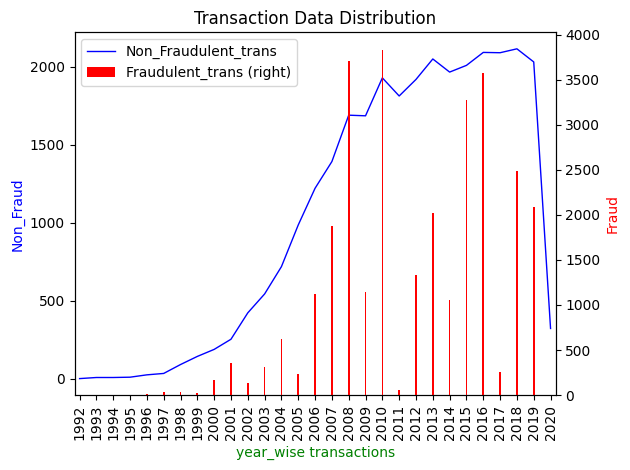

In [38]:
df1=pd.DataFrame()
df1['year']=data['year'].unique().tolist()

df1.sort_values(by='year', inplace = True)

df1['year']=df1['year'].astype(str)
df1=df1.reset_index()
del df1['index']

da=data.groupby(by=['year','Is Fraud?']).size().reset_index(name='Transactions')
da['year']=da['year'].astype(str)

Fraud_trans=[]
Non_Fraud_trans=[]
for i in range(df1.shape[0]):
    da1=da[da['year']==df1['year'][i]]
    if da1.shape[0]>0:
        if da1[da1['Is Fraud?']=='Non_Fraudulent'].shape[0]>0:            
            Non_Fraud_trans.append(da1[da1['Is Fraud?']=='Non_Fraudulent']['Transactions'].tolist()[0])
        else:
            Non_Fraud_trans.append(0)
        if da1[da1['Is Fraud?']=='Fraudulent'].shape[0]>0:
            Fraud_trans.append(da1[da1['Is Fraud?']=='Fraudulent']['Transactions'].tolist()[0])
        else:
            Fraud_trans.append(0)
df1['Non_Fraudulent_trans']=Non_Fraud_trans 
df1['Fraudulent_trans']=Fraud_trans

ax = df1.plot(kind = 'line', x = 'year',
                      y = 'Non_Fraudulent_trans', color = 'Blue',
                      linewidth = 1)
     
ax2 = df1.plot(kind = 'bar', x = 'year', 
                   y = 'Fraudulent_trans', secondary_y = True,
                   color = 'Red',  width = 0.1,
                   ax = ax)
 
#title of the plot
plt.title("Transaction Data Distribution")


ax.set_xlabel('year_wise transactions', color = 'g')
ax.set_ylabel('Non_Fraud', color = "b")
ax2.set_ylabel('Fraud', color = 'r')

#defining display layout 
plt.tight_layout()

#show plot
plt.show()

In [31]:
df1.head()

,year,Non_Fraudulent_trans,Fraudulent_trans
0,1992,2,0
1,1993,9,0
2,1994,9,0
3,1995,11,0
4,1996,26,10


## Overall particular Card number Analysis

In [32]:
data_viz=pd.read_csv('model_dataset.csv')

In [45]:
def visualization(das_df):    
    try:              
        x=int(input('please enter the credit card number:- '))        
        data=das_df[das_df['Card Number']==x] 
        #Data disribution
        
        labels = data['Is Fraud?'].value_counts().index
        values = data['Is Fraud?'].value_counts().values
        fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
        fig.update_layout(
            title="Transaction Data Distribution".upper(),
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#000000"
            )
        )
        
        fig.show()


        labels = data['Has Chip'].value_counts().index
        values = data['Has Chip'].value_counts().values
        fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
        fig.update_layout(
            title="Analysis of chip in card".upper(),
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#000000"
            )
        )
        
        fig.show()
        
          
        df1=pd.DataFrame()
        df1['year']=data['year'].unique().tolist()
        
        df1.sort_values(by='year', inplace = True)
        
        df1['year']=df1['year'].astype(str)
        df1=df1.reset_index()
        del df1['index']
        
        da=data.groupby(by=['year','Is Fraud?']).size().reset_index(name='Transactions')
        da['year']=da['year'].astype(str)
        
        Fraud_trans=[]
        Non_Fraud_trans=[]
        for i in range(df1.shape[0]):
            da1=da[da['year']==df1['year'][i]]
            if da1.shape[0]>0:
                if da1[da1['Is Fraud?']=='Non_Fraudulent'].shape[0]>0:                    
                    Non_Fraud_trans.append(da1[da1['Is Fraud?']=='Non_Fraudulent']['Transactions'].tolist()[0])
                else:
                    Non_Fraud_trans.append(0)
                if da1[da1['Is Fraud?']=='Fraudulent'].shape[0]>0:
                    Fraud_trans.append(da1[da1['Is Fraud?']=='Fraudulent']['Transactions'].tolist()[0])
                else:
                    Fraud_trans.append(0)
        df1['Non_Fraudulent_trans']=Non_Fraud_trans 
        df1['Fraudulent_trans']=Fraud_trans
        a=df1['year'].values
        b=Non_Fraud_trans
        c=Fraud_trans
        
        fig = go.Figure(
        data=go.Scatter(x=a,y=b,name="Non_Fraudulent Transactions",marker=dict(color="blue"),mode="lines+text",text=b,textposition="top right"))
    
        fig.add_trace(go.Bar(x=a,y=c,yaxis="y2",name="Fraudulent Transactions",marker=dict(color="red"),text=c,textposition="inside",))
    
        fig.update_layout(legend=dict(orientation="h"),yaxis=dict(title=dict(text="Non_Fraudulent Transactions"),side="left",),
            yaxis2=dict(title=dict(text="Fraudulent Transactions"),side="right",overlaying="y",tickmode="sync",),
            width=1100,
            height=500,
            title='Transaction data distribution'.upper()
        )
        
        fig.show()   


        df=data.groupby('Use Chip')['Use Chip'].agg(['count']).sort_values(by='count',ascending=False)[:10]
        df=df.reset_index()
        fig=px.bar(data_frame=df,x='Use Chip',y='count',color='Use Chip',barmode='group',text_auto=True,title='Analysis of Types of transactions'.upper())
        fig.show()

        
        df=data.groupby('MCC')['MCC'].agg(['count']).sort_values(by='count',ascending=False)[:10]
        df=df.reset_index()
        fig=px.bar(data_frame=df,x='MCC',y='count',color='MCC',barmode='group',text_auto=True,title='Category code card Wise Fraud Detection'.upper())
        fig.show()

        df1=data.copy()
        df1.loc[df1['Amount'].between(-1000,0), 'amount_range'] = '-1k-0k'
        df1.loc[df1['Amount'].between(0,200), 'amount_range'] = '0-0.2k'
        df1.loc[df1['Amount'].between(200,400), 'amount_range'] = '0.2k-0.4k'
        df1.loc[df1['Amount'].between(400,600), 'amount_range'] = '0.4k-0.6k'
        df1.loc[df1['Amount'].between(600,800), 'amount_range'] = '0.6k-0.8k'
        df1.loc[df1['Amount'].between(800,1000), 'amount_range'] = '0.8k-1k'
        df1.loc[df1['Amount'].between(1000,1200), 'amount_range'] = '1k-1.2k'
        df1.loc[df1['Amount'].between(1200,1400), 'amount_range'] = '1.2k-1.4k'
        df1.loc[df1['Amount'].between(1400,1600), 'amount_range'] = '1.4k-1.6k'
        df1.loc[df1['Amount'].between(1600,1800), 'amount_range'] = '1.6k-1.8k'
        df1.loc[df1['Amount'].between(1800,2000), 'amount_range'] = '1.8k-2k'
        df1.loc[df1['Amount']>2000, 'amount_range'] = '>2k'
        df_d=df1.copy()
        df1=df1.groupby(by=['amount_range','Is Fraud?']).size().reset_index(name='No. of Transactions')
        fig1=px.bar(data_frame=df1,x='amount_range',y='No. of Transactions',color='Is Fraud?',barmode='group',text_auto=True,title='amount_range/is_fraud wise Data detection'.upper())
        fig1.show()

        df=df_d.groupby(by=['Use Chip','amount_range']).size().reset_index(name='No. of Incidents')
        fig20=px.bar(data_frame=df,x='amount_range',y='No. of Incidents',color='Use Chip',barmode='group',title='types of transactions/is_fraud wise Fraud detection'.upper(),text_auto=True)
        fig20.show()

        df=df_d.groupby(by=['Card Type','amount_range']).size().reset_index(name='No. of Incidents')
        fig20=px.bar(data_frame=df,x='amount_range',y='No. of Incidents',color='Card Type',barmode='group',title='types of Card/is_fraud wise Fraud detection'.upper(),text_auto=True)
        fig20.show()

        fig = px.sunburst(
            df_d,
            path=["Card Number", 'Card Brand',"Card Type","Has Chip","Is Fraud?","Use Chip","MCC",'amount_range'],
            title="Overall Data Distribution",
            color="Is Fraud?",
            height=800,
        )
            # display the figure
        fig.show()
 
    except Exception as e:
        print('please enter valid credit card number')

In [46]:
data.head()

,Unnamed: 0,Date,Amount,Use Chip,Merchant City,Merchant State,MCC,Is Fraud?,Current Age,Gender,Latitude,Longitude,Yearly Income - Person,Total Debt,FICO Score,CARD INDEX,Card Brand,Card Type,Card Number,Has Chip,Cards Issued,Credit Limit,year,age_group
0,0,2015-11-15,287.13,Online Transaction,ONLINE,ONLINE,3001,Fraudulent,53,Female,34.15,-117.76,59696,127613,787,0,Visa,Debit,4344676511950444,Yes,2,24295,2015,40-60
1,1,2015-11-15,2.41,Online Transaction,ONLINE,ONLINE,5651,Fraudulent,53,Female,34.15,-117.76,59696,127613,787,0,Visa,Debit,4344676511950444,Yes,2,24295,2015,40-60
2,2,2015-11-16,50.81,Online Transaction,ONLINE,ONLINE,4411,Fraudulent,53,Female,34.15,-117.76,59696,127613,787,0,Visa,Debit,4344676511950444,Yes,2,24295,2015,40-60
3,3,2015-11-16,248.36,Online Transaction,ONLINE,ONLINE,5732,Fraudulent,53,Female,34.15,-117.76,59696,127613,787,0,Visa,Debit,4344676511950444,Yes,2,24295,2015,40-60
4,4,2015-11-16,473.00,Online Transaction,ONLINE,ONLINE,3640,Fraudulent,53,Female,34.15,-117.76,59696,127613,787,0,Visa,Debit,4344676511950444,Yes,2,24295,2015,40-60


In [47]:
visualization(data)